In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split

In [74]:
data = pd.read_csv(
    "./data/diabetes_risk_prediction_dataset.csv")

data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [75]:
data["Age"]= [ int(i > 35) for i in data["Age"]]

In [76]:
x_data = data.copy()
y_data = x_data.pop("class")

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [79]:
x_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
453,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
266,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
146,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1
23,1,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0
121,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
376,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
281,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
13,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1


In [122]:
@tf.autograph.experimental.do_not_convert
def build_model():
    model = Sequential()

    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer ='adam',
        loss = tf.losses.BinaryCrossentropy(),
        metrics = ['accuracy'])
    return model

@tf.autograph.experimental.do_not_convert
def train(x_train_,y_train_, epochs=1000, validation_data=(None,None),shuffle=True, saveto="./models/PredictionModel.keras"):
    model = build_model()
    hist = model.fit(x_train_,y_train_, epochs=epochs, validation_data=validation_data,shuffle=shuffle)
    model.save(saveto)
    return hist


In [123]:
training_hist = train(x_train,y_train, validation_data=(x_test,y_test))

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/13 [=>............................] - ETA: 11s - loss: 0.7890 - accuracy: 0.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fc17b86a6a8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

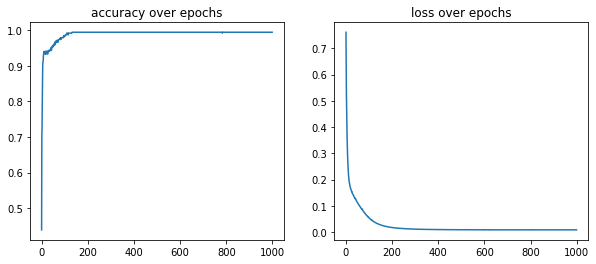

In [124]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))
axis[0].plot(training_hist.history["accuracy"])
axis[0].set_title("accuracy over epochs")
axis[1].plot(training_hist.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

In [128]:
@tf.autograph.experimental.do_not_convert
def make_prediction(input_data):
    return model.predict(input_data)

idx = 15 
test_inp = np.array(x_test)[idx]
test_ans = np.array(y_test)[idx]

pred = make_prediction(np.array([test_inp]))

print(f'Prediction : {np.round(pred[0])[0]} | Actual : {test_ans}')


Prediction : 0.0 | Actual : 0
